   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/101.7 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 1.8/101.7 MB 5.0 MB/s eta 0:00:20
   - -------------------------------------- 2.6/101.7 MB 4.4 MB/s eta 0:00:23
   - -------------------------------------- 3.4/101.7 MB 4.3 MB/s eta 0:00:23
   - -------------------------------------- 4.2/101.7 MB 4.2 MB/s eta 0:00:24
   - -------------------------------------- 5.0/101.7 MB 4.1 MB/s eta 0:00:24
   -- ------------------------------------- 6.0/101.7 MB 4.1 MB/s eta 0:00:24
   -- ------------------------------------- 6.8/101.7 MB 4.1 MB/s eta 0:00:24
   -- ------------------------------------- 7.6/101.7 MB 4.1 MB/s eta 0:00:24
   --- ------------------------------------ 8.4/101.7 MB 4.0 MB/s eta 0:00:24
   --- ------------------------------------ 9.2/101.7 MB 4.0 MB/s eta 0:00:24
   --- ------------------------------------ 10.0/101.7 MB 4.0 MB/s eta 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
  

In [6]:
df = pd.read_csv('StudentsPerformance.csv')

In [7]:
x = df.drop(columns =['math score'], axis = 1 )
y = df['math score']

In [8]:
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder", oh_transformer, cat_features),
     ("StandardScaler", num_transformer, num_features)]
)


In [10]:
x = preprocessor.fit_transform(x)

In [11]:
x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [22]:
def evaluate_model(true, predicted):
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    
    return r2, mae, mse

In [26]:
models = {
    "LinearRegression": LinearRegression(), 
    "Ridge": Ridge(),
    "Lasso": Lasso(), 
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "XGBRegressor": XGBRegressor()

}
model_list = []
r2_list= []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    r2_train, mae_train, mse_train = evaluate_model(y_train, y_train_pred)
    
    r2_test, mae_test, mse_test = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training Set')
    print('R2: ', r2_train)
    print('MAE: ', mae_train)
    print('MSE: ', mse_train)

    print('------------------------------------')

    print('Model Performance for Testing Set')
    print('R2: ', r2_test)
    print('MAE: ', mae_test)
    print('MSE: ', mse_test)
    r2_list.append(r2_test)

    print('='*40)
    print('\n')

LinearRegression
Model Performance for Training Set
R2:  0.8743172040139593
MAE:  4.266711846071957
MSE:  28.33487038064859
------------------------------------
Model Performance for Testing Set
R2:  0.8804332983749564
MAE:  4.214763142474852
MSE:  29.095169866715516


Ridge
Model Performance for Training Set
R2:  0.8743042615212909
MAE:  4.264987823725982
MSE:  28.33778823308244
------------------------------------
Model Performance for Testing Set
R2:  0.8805931485028738
MAE:  4.21110068801426
MSE:  29.056272192348292


Lasso
Model Performance for Training Set
R2:  0.8071462015863456
MAE:  5.206302661246526
MSE:  43.47840400585579
------------------------------------
Model Performance for Testing Set
R2:  0.8253197323627852
MAE:  5.157881810347763
MSE:  42.506416838411624


KNeighborsRegressor
Model Performance for Training Set
R2:  0.8554388403823893
MAE:  4.5177499999999995
MSE:  32.59094999999999
------------------------------------
Model Performance for Testing Set
R2:  0.7840299

In [27]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model', 'R2']).sort_values(by = 'R2', ascending = False)

,Model,R2
1,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.854646
6,AdaBoostRegressor,0.852253
8,CatBoostRegressor,0.851632
9,XGBRegressor,0.827797
2,Lasso,0.825320
3,KNeighborsRegressor,0.784030
4,DecisionTreeRegressor,0.745026
7,SVR,0.728600


In [28]:
l_model = LinearRegression(fit_intercept = True)
l_model = l_model.fit(x_train, y_train)
y_pred = l_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print('R2 Score of Linear Regression Model: ', score)

R2 Score of Linear Regression Model:  88.04332983749565


Text(0, 0.5, 'Predictions')

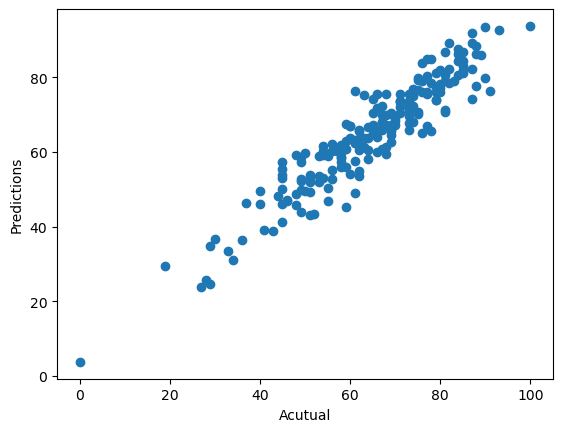

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual')
plt.ylabel('Predictions')

<Axes: xlabel='math score'>

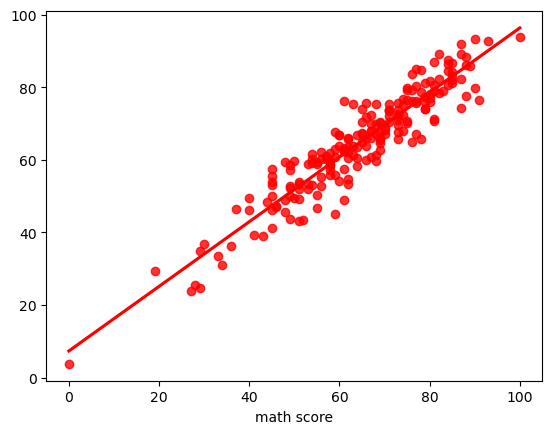

In [30]:
sns.regplot(x =y_test,y=y_pred,ci= None, color ='red')

In [32]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
